In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pima-indian-diabetes.csv')
df.head()

Pregnancies 
 Glucose 
 BloodPressure 
 SkinThickness 
 Insulin 
 BMI 
 DiabetesPedigreeFunction 
 Age 
 DiabetesPresence 
 
 
 
 
 0 
 6 
 148 
 72 
 35 
 0 
 33.6 
 0.627 
 50 
 1 
 
 
 1 
 1 
 85 
 66 
 29 
 0 
 26.6 
 0.351 
 31 
 0 
 
 
 2 
 8 
 183 
 64 
 0 
 0 
 23.3 
 0.672 
 32 
 1 
 
 
 3 
 1 
 89 
 66 
 23 
 94 
 28.1 
 0.167 
 21 
 0 
 
 
 4 
 0 
 137 
 40 
 35 
 168 
 43.1 
 2.288 
 33 
 1

In [3]:
X = df.loc[:, df.columns != 'DiabetesPresence']
Y = df.loc[:, 'DiabetesPresence']

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.fit(X, Y, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 31.5349 - accuracy: 0.6510
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 19.5563 - accuracy: 0.6536
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 11.5263 - accuracy: 0.6263
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 8.2382 - accuracy: 0.5846
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 5.7860 - accuracy: 0.5859
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 4.1219 - accuracy: 0.5716
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 3.0630 - accuracy: 0.5599
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 2.4941 - accuracy: 0.5573
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 2.1142 - accuracy: 0.5599
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 1.8197 - accuracy: 0.5612
Epoch 

In [8]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy * 100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5781 - accuracy: 0.6836
Accuracy: 68.36


In [9]:
##Premièrement, on prend aléatoirement dans notre dataset 80% des lignes. Puis, nous prenons les lignes restantes pour les données d’évaluation.

In [10]:
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)

In [11]:
df_train.head()

Pregnancies 
 Glucose 
 BloodPressure 
 SkinThickness 
 Insulin 
 BMI 
 DiabetesPedigreeFunction 
 Age 
 DiabetesPresence 
 
 
 
 
 323 
 13 
 152 
 90 
 33 
 29 
 26.8 
 0.731 
 43 
 1 
 
 
 727 
 0 
 141 
 84 
 26 
 0 
 32.4 
 0.433 
 22 
 0 
 
 
 444 
 4 
 117 
 62 
 12 
 0 
 29.7 
 0.380 
 30 
 1 
 
 
 492 
 4 
 99 
 68 
 38 
 0 
 32.8 
 0.145 
 33 
 0 
 
 
 547 
 4 
 131 
 68 
 21 
 166 
 33.1 
 0.160 
 28 
 0

In [12]:
##À partir de ces données, on peut créer les X features et Y target. Le processus est le même que dans la première partie

In [13]:
X_train = df_train.loc[:, df.columns != 'DiabetesPresence']
Y_train = df_train.loc[:, 'DiabetesPresence']
X_test = df_test.loc[:, df.columns != 'DiabetesPresence']
Y_test = df_test.loc[:, 'DiabetesPresence']

In [14]:
##Modèle
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
##Le diagramme d’un Réseau de Neurones nous permet de mieux comprendre sa structure. Pour cela on utiliser la fonction plot_model
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=False, show_layer_activations=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 17.7586 - accuracy: 0.3381 - val_loss: 8.6282 - val_accuracy: 0.3821
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 4.7485 - accuracy: 0.3686 - val_loss: 1.6915 - val_accuracy: 0.5366
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3139 - accuracy: 0.5255 - val_loss: 1.0695 - val_accuracy: 0.4959
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.9357 - accuracy: 0.6008 - val_loss: 0.8707 - val_accuracy: 0.5366
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.8159 - accuracy: 0.6232 - val_loss: 0.8264 - val_accuracy: 0.5691
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.7696 - accuracy: 0.6578 - val_loss: 0.8145 - val_accuracy: 0.5854
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.7573 - accuracy: 0.6293 - val_loss: 0.7927 - val_accuracy: 0.6098
Epoch 8/50
50/50 [=

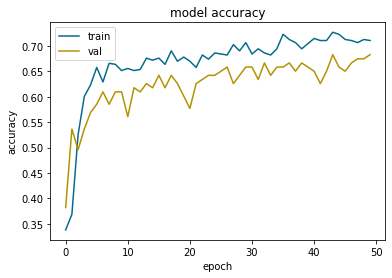

In [18]:
##Analyse
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], color='#066b8b')
plt.plot(history.history['val_accuracy'], color='#b39200')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
##Predictions sur des nouvelles données: On peut réutiliser notre modèle pour lui faire prédire la présence de diabète sur de nouvelles données:Utilisation de la fonction predict
predictions = model.predict(X_test)
##Modifions le résultat de ces prédiction pour avoir uniquement des 0 et 1 
predictions = (model.predict(X_test) > 0.5).astype(int)

In [20]:
##afficher les premieres prédictions et les comparer aux résultats attendu :
for i in range(5):
    print('%s => Prédit : %d,  Attendu : %d' % (X_test.iloc[i].tolist(), predictions[i], Y_test.iloc[i]))

[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => Prédit : 1,  Attendu : 1
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => Prédit : 0,  Attendu : 0
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => Prédit : 0,  Attendu : 1
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0] => Prédit : 1,  Attendu : 1
[13.0, 145.0, 82.0, 19.0, 110.0, 22.2, 0.245, 57.0] => Prédit : 0,  Attendu : 0


In [21]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy * 100))

5/5 [==============================] - 0s 7ms/step - loss: 0.6236 - accuracy: 0.6623
Accuracy: 66.23


# Prediction du diabete avec un modele de classification de sklearn KNeighborsClassifier

In [22]:
df.head()

Pregnancies 
 Glucose 
 BloodPressure 
 SkinThickness 
 Insulin 
 BMI 
 DiabetesPedigreeFunction 
 Age 
 DiabetesPresence 
 
 
 
 
 0 
 6 
 148 
 72 
 35 
 0 
 33.6 
 0.627 
 50 
 1 
 
 
 1 
 1 
 85 
 66 
 29 
 0 
 26.6 
 0.351 
 31 
 0 
 
 
 2 
 8 
 183 
 64 
 0 
 0 
 23.3 
 0.672 
 32 
 1 
 
 
 3 
 1 
 89 
 66 
 23 
 94 
 28.1 
 0.167 
 21 
 0 
 
 
 4 
 0 
 137 
 40 
 35 
 168 
 43.1 
 2.288 
 33 
 1

In [45]:
##On va utiliser un modele de classification de sklearn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [46]:
model = KNeighborsClassifier()

In [47]:
##Il nous faut 2 tableaux X et y. y correspondand aux diabetique et x un tableau avec toute les autres variables

In [48]:
yd = df['DiabetesPresence']
Xd = df.drop('DiabetesPresence', axis=1)

In [49]:
model.fit(Xd, yd)
model.score(Xd, yd)

0.8033854166666666

In [50]:
model.predict(Xd)

In [53]:
##Fonction de prediction du diabete
def diabete(model, Pregnancies=3, Glucose=0, BloodPressure=44, SkinThickness=35, Insulin=94, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=56):
    x = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction,
                  Age]).reshape(1, 8)  ##reshape permet de créer un tableau a 2 dimension avec 1 ligne et 8 colonnes
    print(model.predict(x))
    print(model.predict_proba(x))  ##j'ai 80% de chance d"appartenir à la classe 0 (pas de diabete)

In [54]:
diabete(model)

[0]
[[0.8 0.2]]


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
